In [1]:
import pandas as pd
import numpy as np
import os

from my_modules import visualize as vz

In [2]:
storage = os.environ['MICOM_EXP'] + 'setA_mono_simTime144h/' # on Peregrine
print(storage)

run_status_file = storage + "run_status.tsv"
run_status = pd.read_csv(run_status_file, sep="\t")

rep_simID_dict = run_status.loc[run_status['program_log_doneSim']==1, ['rep_name', 'simID']].groupby('rep_name')['simID'].apply(list).to_dict()

/data/s4278836/First_project/experiments/setA_mono_simTime144h/


In [3]:
rep_simID_check_dict = {x: {rep_simID_dict[x][i]: 1 for i in range(len(rep_simID_dict[x]))} for x in rep_simID_dict.keys()}
rep_simID_df = pd.DataFrame.from_dict(rep_simID_check_dict)
rep_simID_df.sum() 

rep1    36
rep2    36
rep3    36
dtype: int64

For each replicate, if sum returns 36 means all 36 cases (18 species in plastic or non-plastic mode), it means all simulations have sucessfully completed.

Here, all replicates have sum of 36 => All 36 cases were sucessfully replicated 3 times

In [4]:
rep_name_list = rep_simID_df.columns.values
print(rep_name_list)

speciesID_set = set([x.rsplit('_', 1)[0] for x in rep_simID_df.index.values])
print(speciesID_set)

culture_type_list = ['batch', 'continuous']

media = ['EU_avg', 'DACH', 'diabetes2', 
         'gluten_free', 'high_fat', 'high_fiber', 
         'high_protein', 'mediterranean', 'unhealthy', 
         'vegan', 'vegetarian']

['rep1' 'rep2' 'rep3']
{'setA_21', 'setA_19', 'setA_26', 'setA_8', 'setA_24', 'setA_14', 'setA_17', 'setA_18', 'setA_22', 'setA_3', 'setA_4', 'setA_9', 'setA_13', 'setA_20', 'setA_15', 'setA_6', 'setA_11', 'setA_16'}


In [5]:
for ID in speciesID_set:
    fd = vz.plot_flux_dynamic(storage=storage, replicates=rep_name_list, speciesID=ID, media=media, 
                              max_time=6.0, normalize=True, fig_dir="./fig/flux_dynamics/")
    print(fd)

./fig/flux_dynamics/setA_21.flux_dynamic.svg: Plotted & Saved.
./fig/flux_dynamics/setA_19.flux_dynamic.svg: Plotted & Saved.
./fig/flux_dynamics/setA_26.flux_dynamic.svg: Plotted & Saved.
./fig/flux_dynamics/setA_8.flux_dynamic.svg: Plotted & Saved.
./fig/flux_dynamics/setA_24.flux_dynamic.svg: Plotted & Saved.
./fig/flux_dynamics/setA_14.flux_dynamic.svg: Plotted & Saved.
./fig/flux_dynamics/setA_17.flux_dynamic.svg: Plotted & Saved.
./fig/flux_dynamics/setA_18.flux_dynamic.svg: Plotted & Saved.
./fig/flux_dynamics/setA_22.flux_dynamic.svg: Plotted & Saved.
./fig/flux_dynamics/setA_3.flux_dynamic.svg: Plotted & Saved.
./fig/flux_dynamics/setA_4.flux_dynamic.svg: Plotted & Saved.
./fig/flux_dynamics/setA_9.flux_dynamic.svg: Plotted & Saved.
./fig/flux_dynamics/setA_13.flux_dynamic.svg: Plotted & Saved.
./fig/flux_dynamics/setA_20.flux_dynamic.svg: Plotted & Saved.
./fig/flux_dynamics/setA_15.flux_dynamic.svg: Plotted & Saved.
./fig/flux_dynamics/setA_6.flux_dynamic.svg: Plotted & Save

1

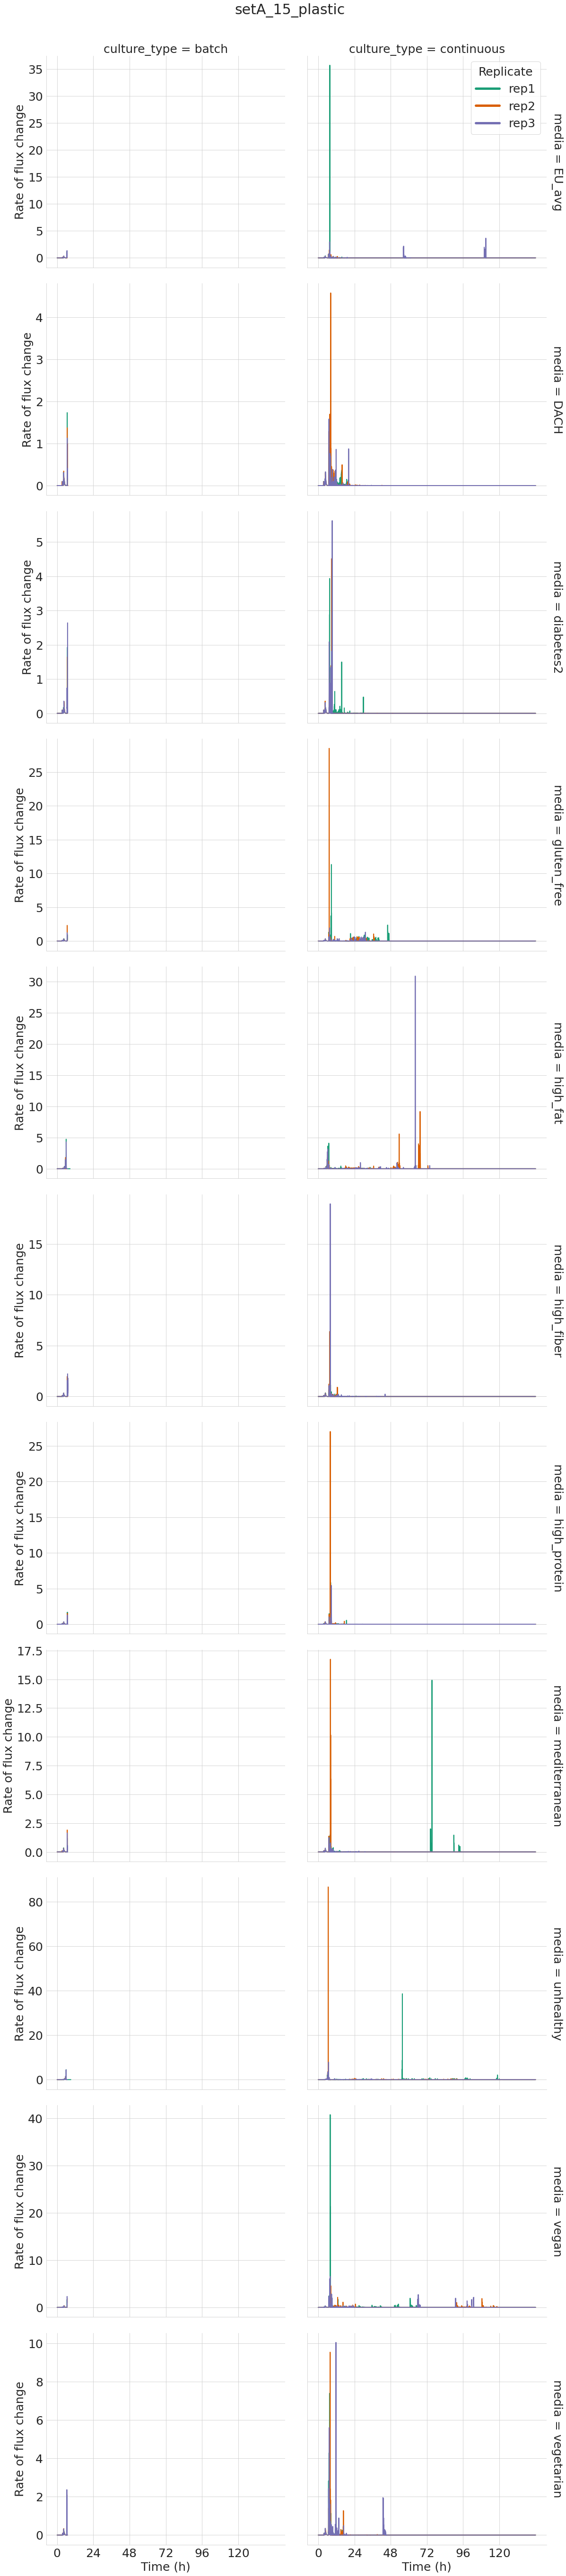

In [6]:
ID = 'setA_15'
vz.plot_flux_dynamic(storage=storage, replicates=rep_name_list, speciesID=ID, media=media, 
#                      max_time=24.0, normalize=True, 
                     save_fig=False)

1

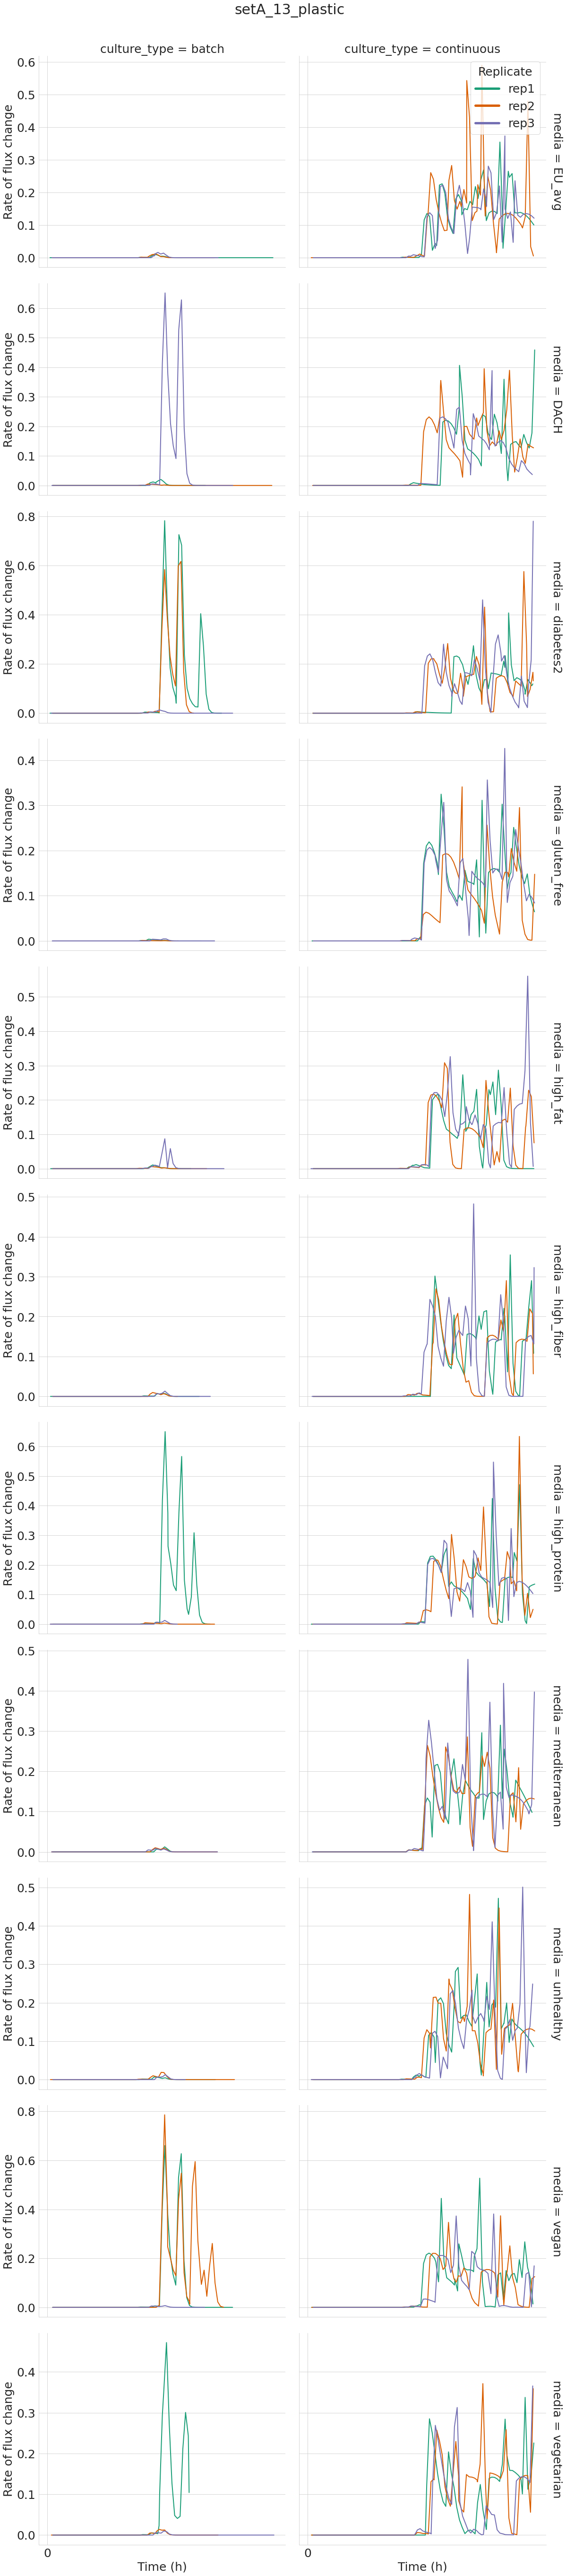

In [7]:
ID = 'setA_13'
vz.plot_flux_dynamic(storage=storage, replicates=rep_name_list, speciesID=ID, media=media, 
                     max_time=2.0, normalize=True, 
                     save_fig=False)